# Predicting Movie Ratings

## Dataset Description
The dataset used for this analysis was sourced from Kaggle: [https://www.kaggle.com/nielspace/imdb-data](https://www.kaggle.com/nielspace/imdb-data)  This dataset is includes the 1000 top-ranking films from 2006 to 2016 from IMDb (Internet Movie Database), one of the most reliable sources of information concerning film and television.  

The variables include:  
1. Rank: Ranking assigned to each movie, unique value for each
2. Title: Movie title
3. Genre: Genre of movie
4. Description: Brief description of movie
5. Director: Movie director
6. Actors: Actors featured in movie
7. Year: Year movie was released
8. Runtime: Duration of movie in minutes
9. Rating: Rating of movie on scale of 1.0 - 10.0
10. Votes: Number of people who rated the movie
11. Revenue: The revenue generated in million US dollars
12. Metascore: Rating of movie based on critics' reviews on scale of 1-100

## Read in dataset

In [56]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./IMBd_Dataset.csv")
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


## Clean dataset

In [58]:
# rename columns to eliminate spaces and spelling mistakes
df.columns = ['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime', 'Rating', 'Votes', 'Revenue', 'Metascore']

In [59]:
#Create a complete list Genres to later create dummy Genre variables for inclusion in model
new = df["Genre"].str.split(',')
newtwo = pd.DataFrame(new)

df2 = pd.DataFrame()
df2[['Genre1', 'Genre2', 'Genre3']] = pd.DataFrame(newtwo.Genre.values.tolist(), index = newtwo.index)

gone = set(df2['Genre1'].to_list())
gtwo = set(df2['Genre2'].to_list())
gthree = set(df2['Genre3'].to_list())

gone.update(set(gtwo))
gone.update(set(gthree))
gone.remove(None)
print(list(gone))

['Fantasy', 'Crime', 'Romance', 'War', 'Biography', 'Sport', 'History', 'Adventure', 'Animation', 'Mystery', 'Musical', 'Drama', 'Action', 'Comedy', 'Music', 'Horror', 'Family', 'Sci-Fi', 'Thriller', 'Western']


In [60]:
#Create dummy variables testing which Genre applies to each movie
for g in gone:
    df[g + '_Ind'] = df['Genre'].apply(lambda x: 1 if g in x else 0)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
Rank             1000 non-null int64
Title            1000 non-null object
Genre            1000 non-null object
Description      1000 non-null object
Director         1000 non-null object
Actors           1000 non-null object
Year             1000 non-null int64
Runtime          1000 non-null int64
Rating           1000 non-null float64
Votes            1000 non-null int64
Revenue          872 non-null float64
Metascore        936 non-null float64
Fantasy_Ind      1000 non-null int64
Crime_Ind        1000 non-null int64
Romance_Ind      1000 non-null int64
War_Ind          1000 non-null int64
Biography_Ind    1000 non-null int64
Sport_Ind        1000 non-null int64
History_Ind      1000 non-null int64
Adventure_Ind    1000 non-null int64
Animation_Ind    1000 non-null int64
Mystery_Ind      1000 non-null int64
Musical_Ind      1000 non-null int64
Drama_Ind        1000 non-null int

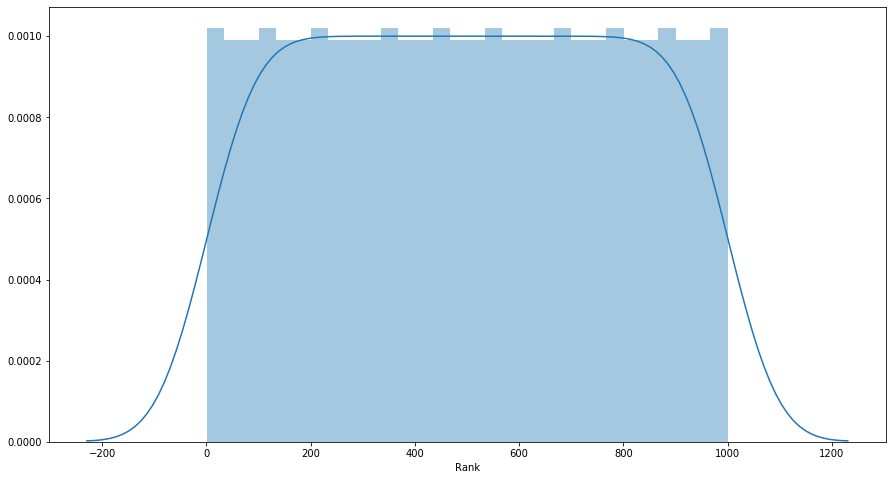

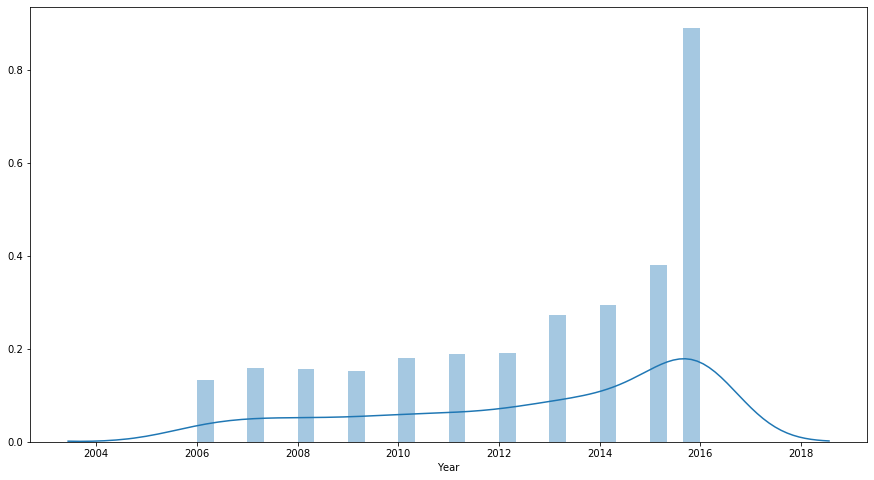

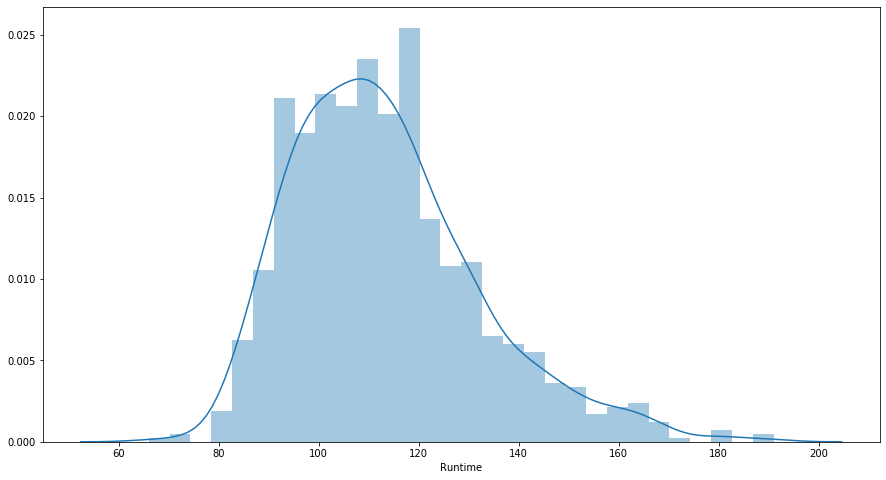

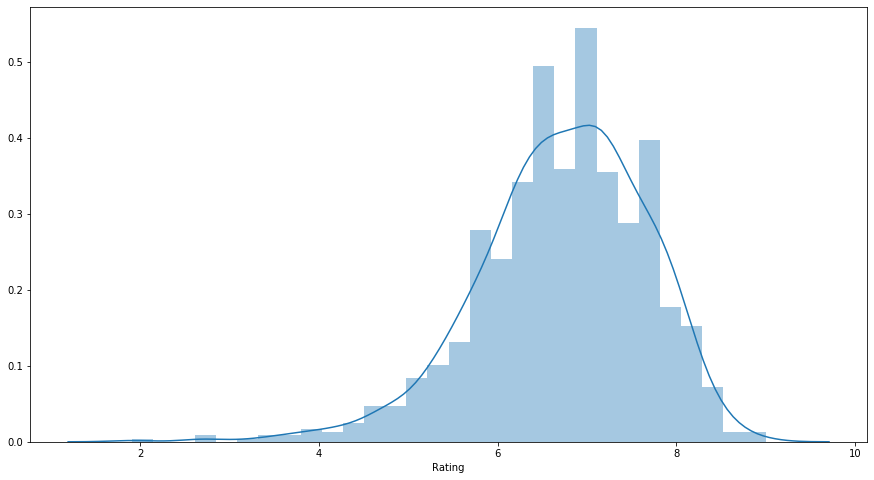

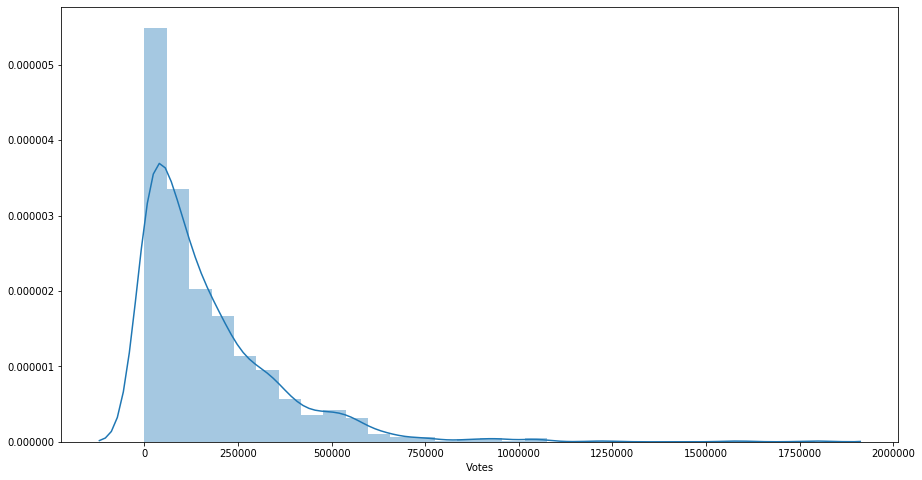

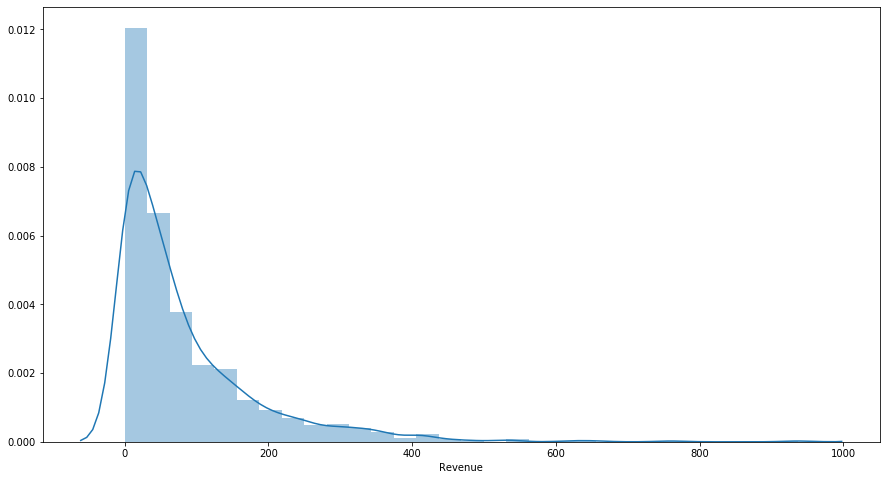

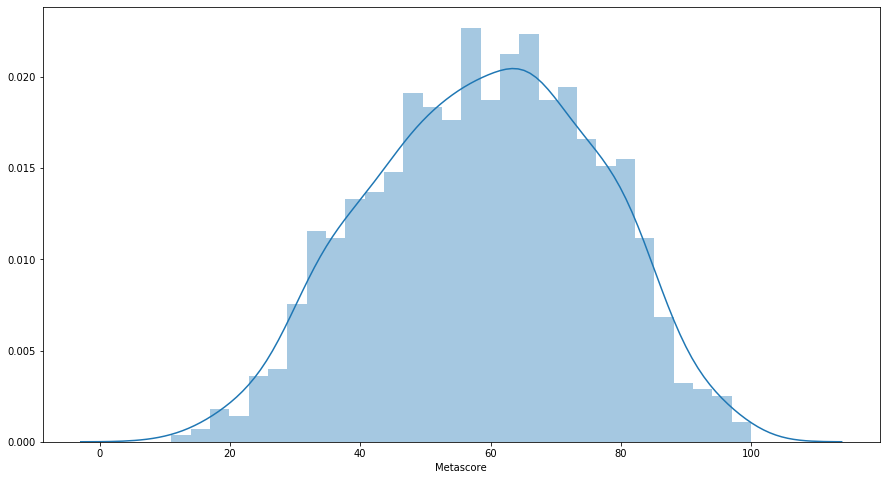

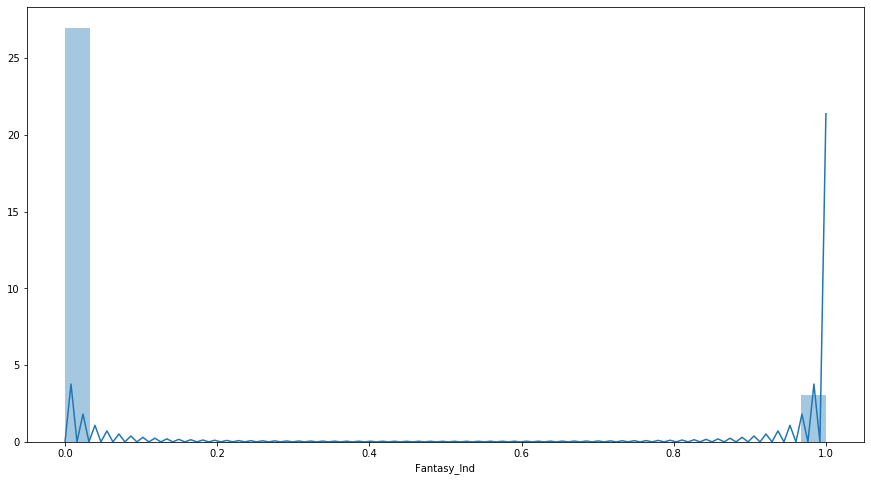

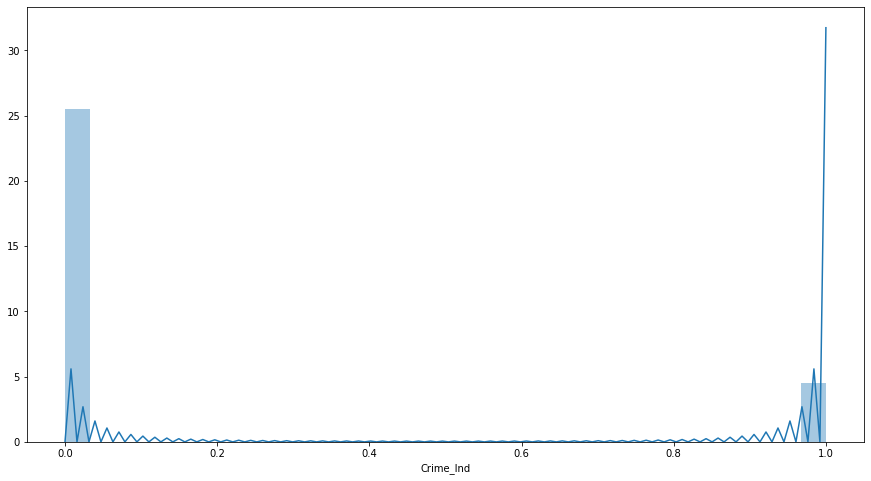

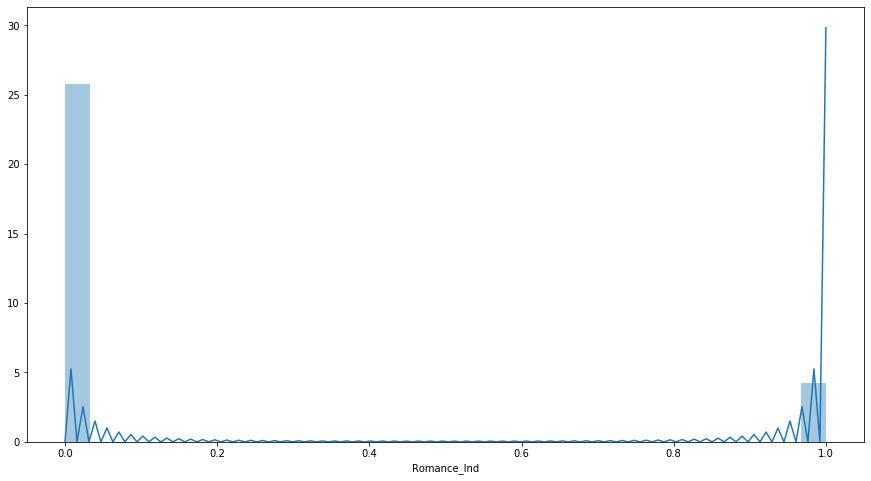

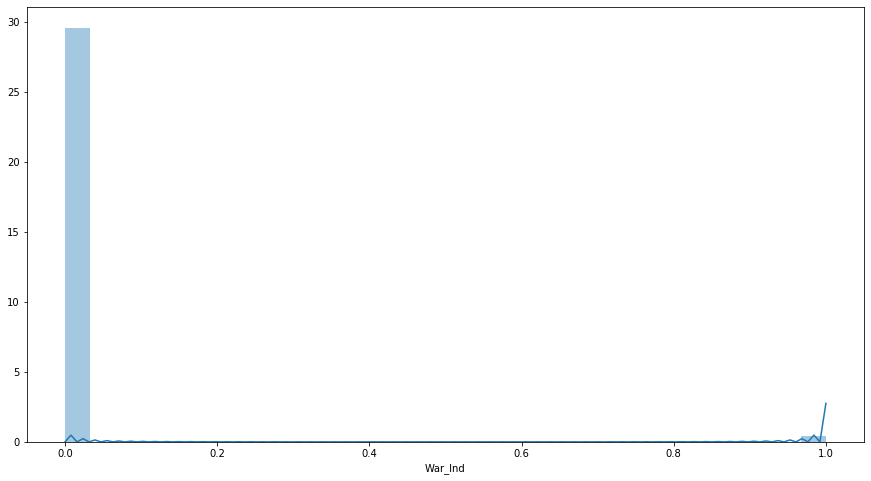

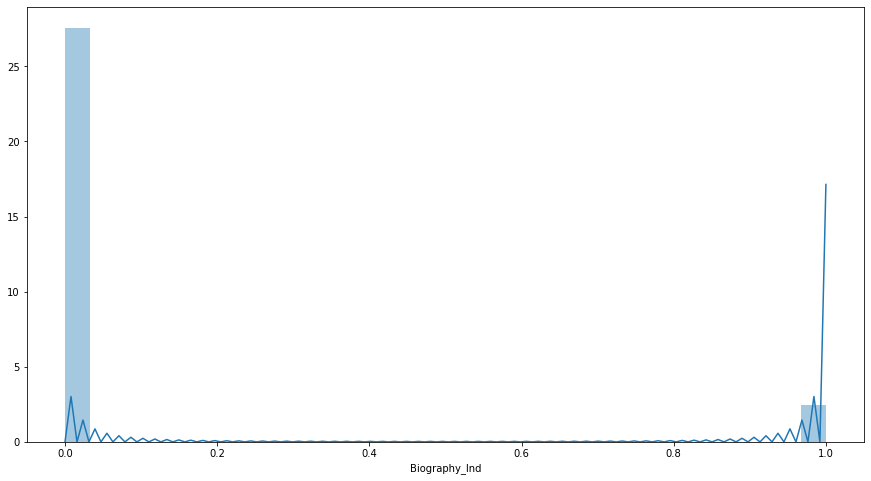

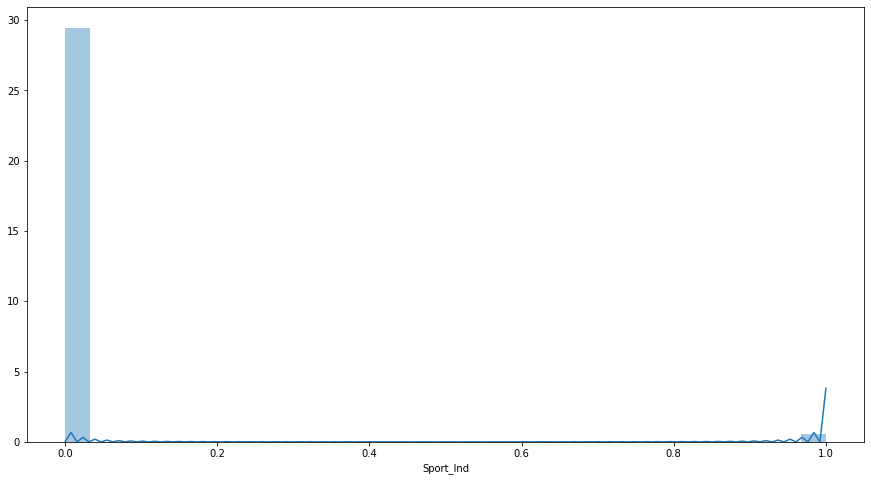

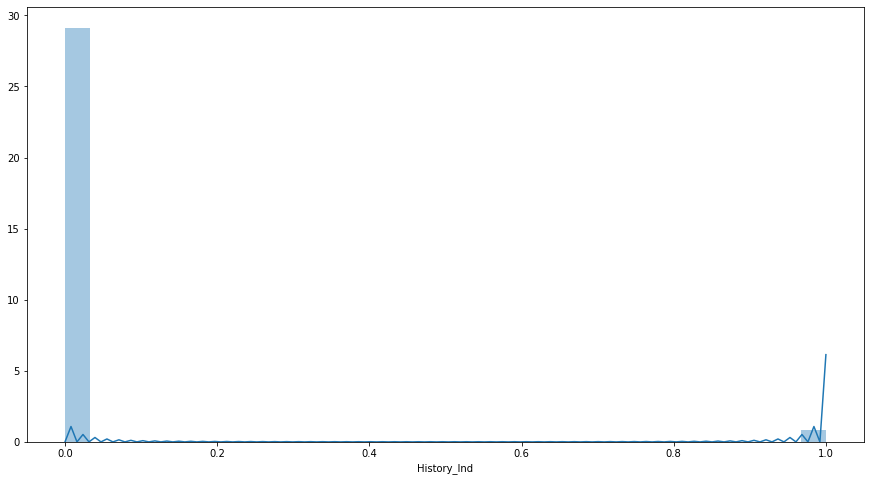

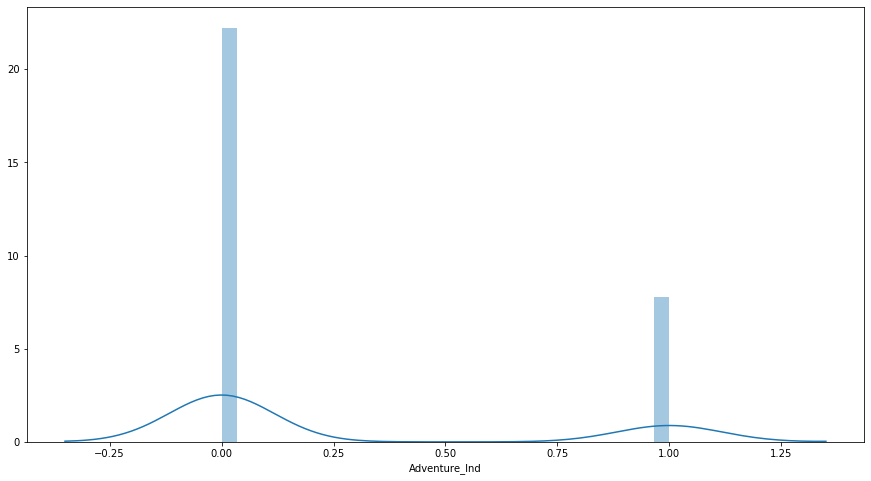

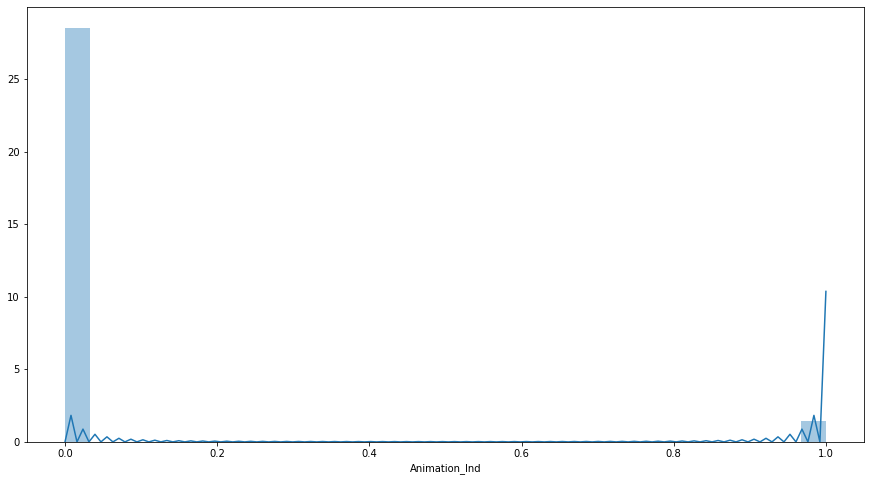

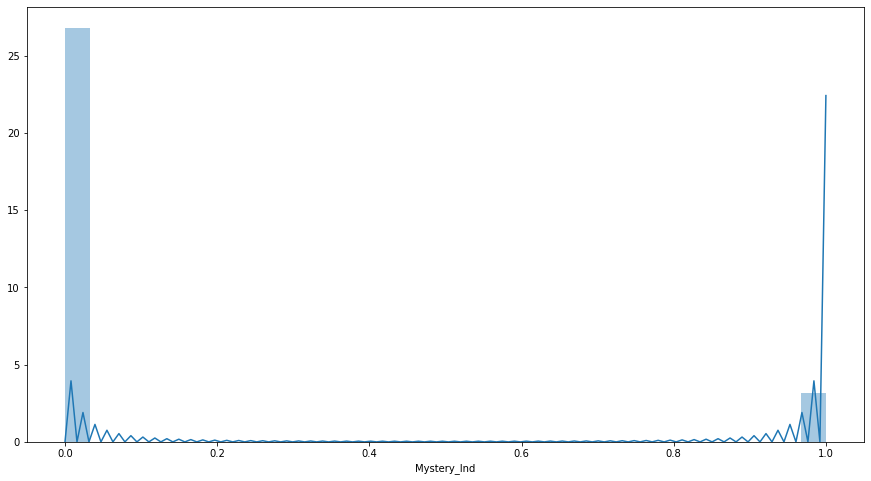

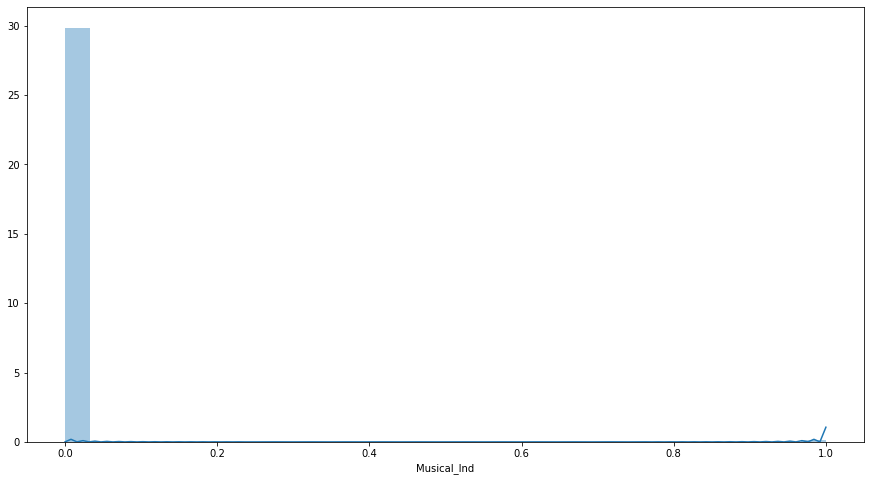

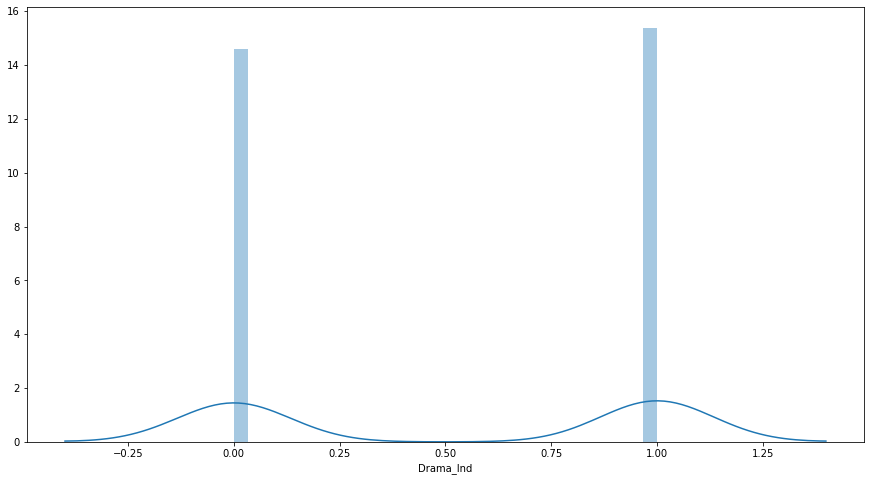

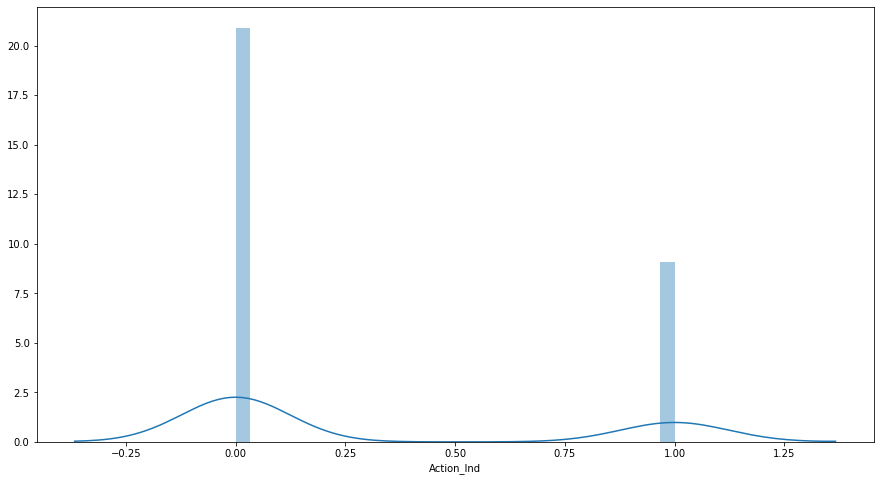

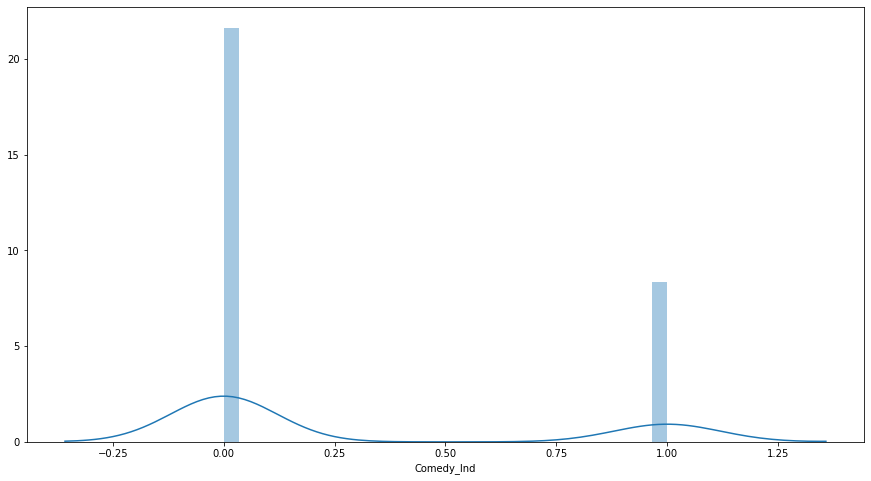

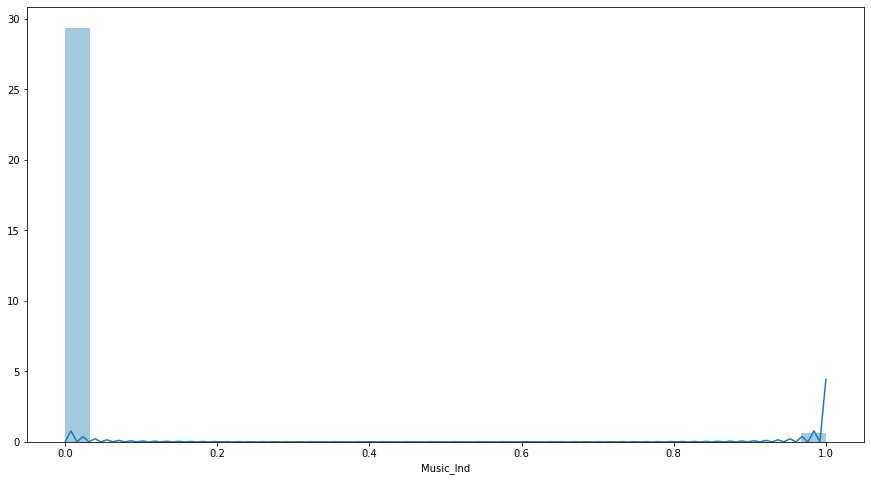

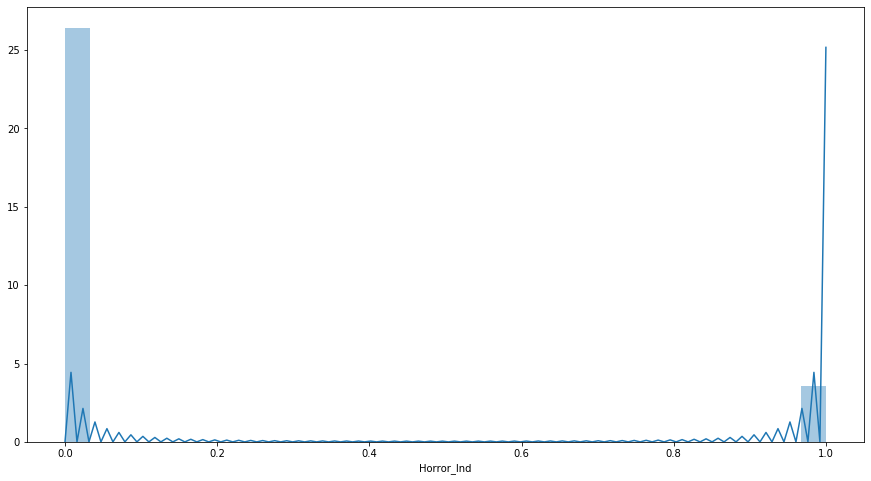

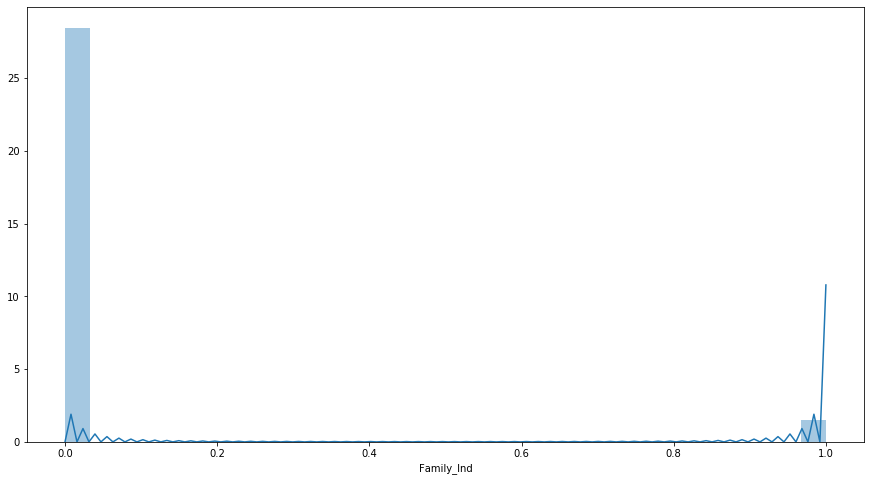

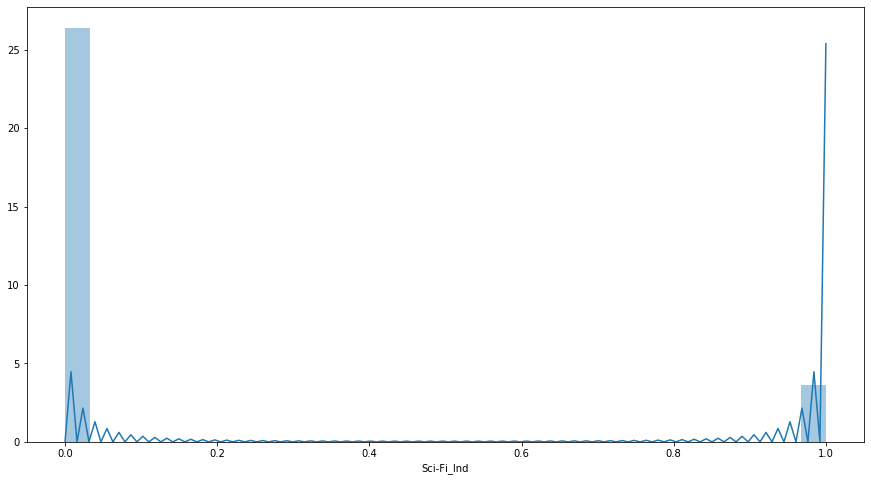

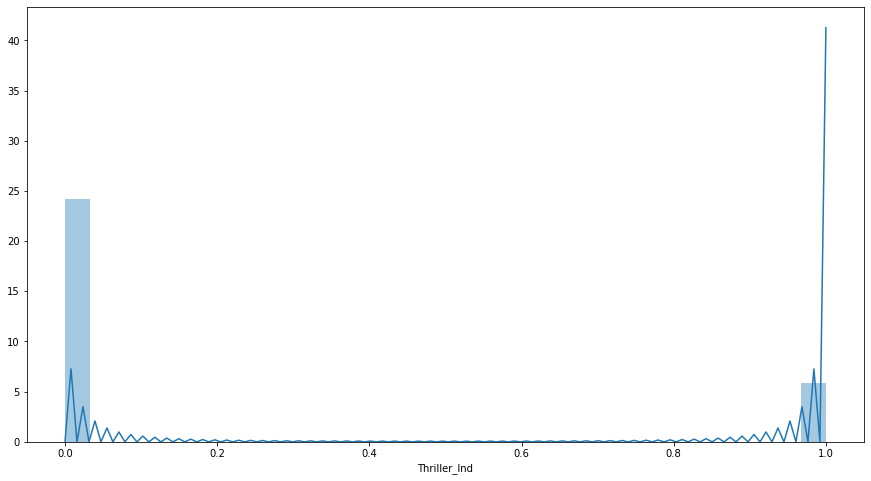

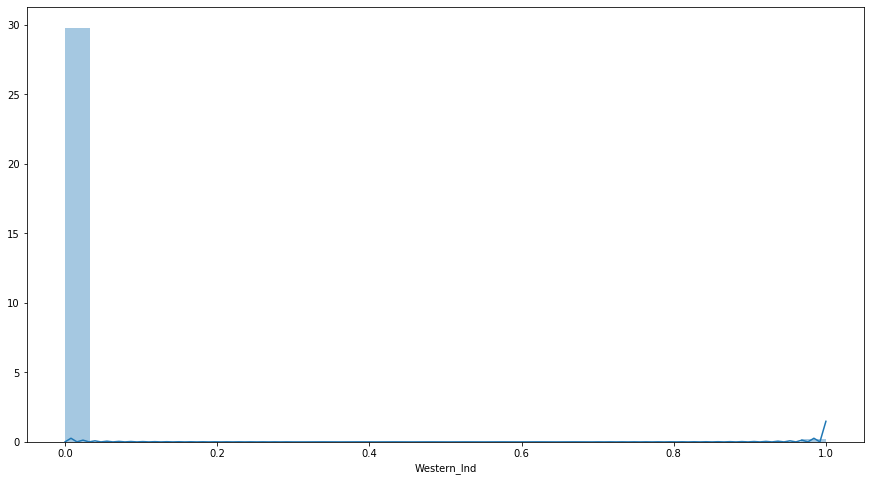

In [62]:
# Plot histogram using seaborn
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

numeric_cols = df.select_dtypes('number').columns

for i in numeric_cols:
    plt.figure(figsize=(15,8))
    sns.distplot(df[i], bins =30)

In [63]:
# Determine what percentage of values in each column are null
nulls = df.isnull().sum()
print(nulls/len(df) * 100)

Rank              0.0
Title             0.0
Genre             0.0
Description       0.0
Director          0.0
Actors            0.0
Year              0.0
Runtime           0.0
Rating            0.0
Votes             0.0
Revenue          12.8
Metascore         6.4
Fantasy_Ind       0.0
Crime_Ind         0.0
Romance_Ind       0.0
War_Ind           0.0
Biography_Ind     0.0
Sport_Ind         0.0
History_Ind       0.0
Adventure_Ind     0.0
Animation_Ind     0.0
Mystery_Ind       0.0
Musical_Ind       0.0
Drama_Ind         0.0
Action_Ind        0.0
Comedy_Ind        0.0
Music_Ind         0.0
Horror_Ind        0.0
Family_Ind        0.0
Sci-Fi_Ind        0.0
Thriller_Ind      0.0
Western_Ind       0.0
dtype: float64


In [64]:
# drop the description column from the dataset, it is unnecessary
df = df.drop(columns = 'Description')

# drop the Revenue column from the dataset, filling in values would affect the distribution and impact analysis
df.dropna(subset=['Revenue'], inplace=True)

# fill in the missing Metascore values with the mean Metascore
df.Metascore.fillna(df.Metascore.mean(), inplace=True)

# double-check that there are no more null values
df.isnull().sum()

Rank             0
Title            0
Genre            0
Director         0
Actors           0
Year             0
Runtime          0
Rating           0
Votes            0
Revenue          0
Metascore        0
Fantasy_Ind      0
Crime_Ind        0
Romance_Ind      0
War_Ind          0
Biography_Ind    0
Sport_Ind        0
History_Ind      0
Adventure_Ind    0
Animation_Ind    0
Mystery_Ind      0
Musical_Ind      0
Drama_Ind        0
Action_Ind       0
Comedy_Ind       0
Music_Ind        0
Horror_Ind       0
Family_Ind       0
Sci-Fi_Ind       0
Thriller_Ind     0
Western_Ind      0
dtype: int64

## Dataset cleaning steps  
To clean the dataset, I first started by renaming all of the columns to ensure there were no hidden spaces or misspellings.  <br> Next, I noticed in the Genre column there were many rows with multiple genres assigned. To capture this information for analysis I split the genres into three columns because movies could have up to three genres assigned and created a list of all unique genres. With this list I encoded dummy variables for each of the genres so that Genre became numerical information useful for analysis.  <br> After creating the dummy variable columns, I created histrograms and density graphs of all numerical columns in the dataset to determine how best to handle columnms containing null values. Because the Revenue column appears to have an exponential distribution and needs to be numerical for analysis, I dropped the rows missing a value for Revenue. Since the Metascore column appears to have a normal distribution, I filled the missing values of this column with the mean of the other values to preserve the distribution.

## Exploratory Data Analysis

Begin by creating boxplots and QQ-plots of each of the non-dummy numerical columns

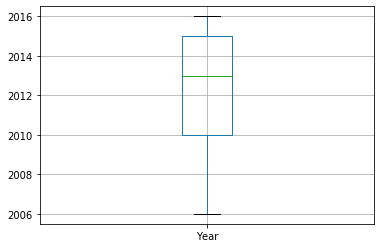

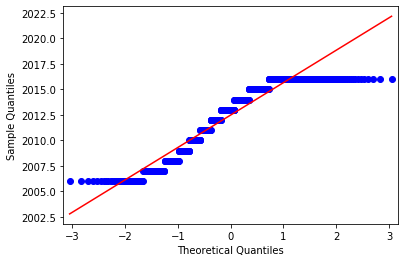

In [65]:
df.boxplot(column = ['Year'])

import statsmodels.api as sm
sm.qqplot(df.Year, line='s')
plt.show()

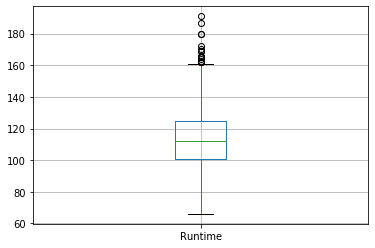

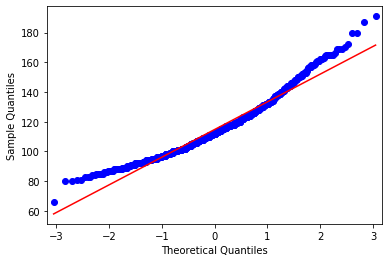

In [66]:
df.boxplot(column = ['Runtime'])

import statsmodels.api as sm
sm.qqplot(df.Runtime, line='s')
plt.show()

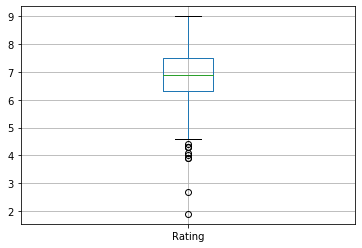

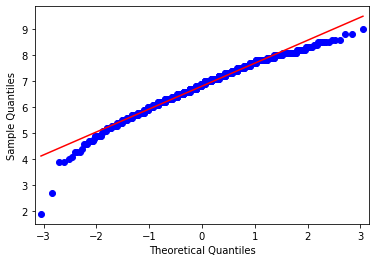

In [67]:
df.boxplot(column = ['Rating'])

import statsmodels.api as sm
sm.qqplot(df.Rating, line='s')
plt.show()

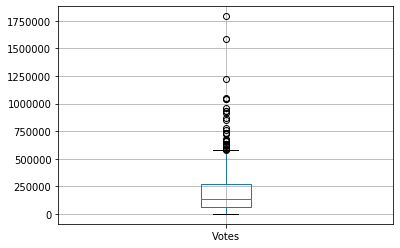

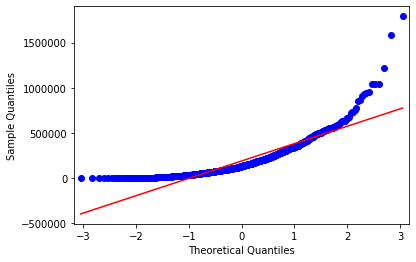

In [68]:
df.boxplot(column = ['Votes'])

import statsmodels.api as sm
sm.qqplot(df.Votes, line='s')
plt.show()

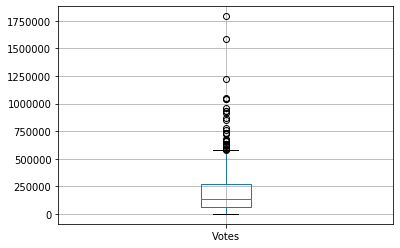

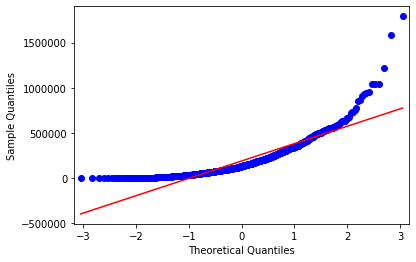

In [69]:
df.boxplot(column = ['Votes'])

import statsmodels.api as sm
sm.qqplot(df.Votes, line='s')
plt.show()

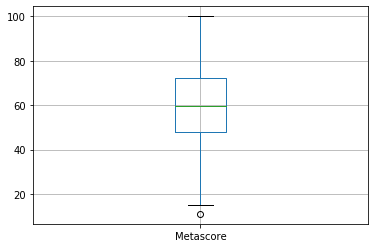

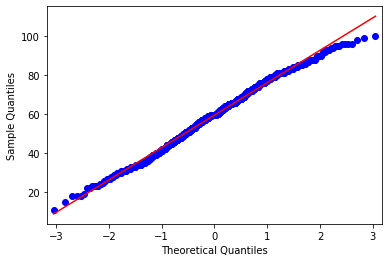

In [70]:
df.boxplot(column = ['Metascore'])

import statsmodels.api as sm
sm.qqplot(df.Metascore, line='s')
plt.show()

Examine the correlation between these non-dummy numerical columns next

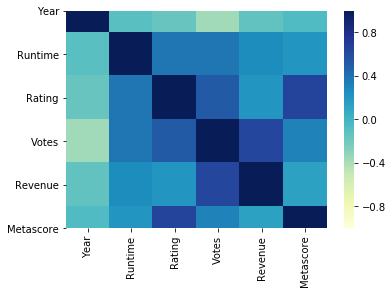

In [71]:
# plot using seaborn

df_corr = df[['Year', 'Runtime',  'Rating', 'Votes', 'Revenue', 'Metascore']].corr()
sns.heatmap(df_corr, 
    xticklabels=df_corr.columns.values, # x-axis values are the column names
    yticklabels=df_corr.columns.values, # y-axis labels are the column names
    vmin=-1, # minimum value is -1
    vmax=1, # maximum value is 1
    center=0, # centering around 0 for the color switchover
    cmap="YlGnBu", # color palette
    square=True) # ensures the seaborn heatmap is composed of squares

Some of the columns look highly correlated. Next look at the covariance.

In [92]:
df[['Year', 'Runtime', 'Rating', 'Votes', 'Revenue', 'Metascore']].cov()

,Year,Runtime,Rating,Votes,Revenue,Metascore
Year,10.135001,-5.893936e+00,-0.425347,-2.226774e+05,-4.167756e+01,-3.219806e+00
Runtime,-5.893936,3.471941e+02,6.203914,1.357191e+06,5.155245e+02,6.661915e+01
Rating,-0.425347,6.203914e+00,0.777349,8.737044e+04,1.981433e+01,9.619515e+00
Votes,-222677.389201,1.357191e+06,87370.440817,3.691489e+10,1.268983e+07,1.046496e+06
Revenue,-41.677565,5.155245e+02,19.814329,1.268983e+07,1.066129e+04,2.424598e+02
Metascore,-3.219806,6.661915e+01,9.619515,1.046496e+06,2.424598e+02,2.761662e+02


Now it is time to split the dataset in to training and test subset to standardize, normalize, and eliminate outlier values.

In [142]:
df_features = df.drop(columns = ['Rating', 'Title', 'Director', 'Genre', 'Actors', 'Rank', 'Year'])
df_target = df['Rating'].copy()
df2 = df.drop(columns = ['Title', 'Director', 'Genre', 'Actors', 'Rank'])

In [143]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df_features, df_target, # input x=features, y=targets
test_size = 0.3) # set aside 30% for testing

In [144]:
# Create the Scaler object
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()

# apply the transformation to the training data
X_train_std = std_scaler.fit_transform(xTrain) 


# apply the transformation to the testing data
X_test_std = std_scaler.transform(xTest) # but we only transform our testing data with already fit scaler

# convert resulting array back to dataframe
Xtest_std = pd.DataFrame(X_test_std,
                     columns=xTrain.columns)

Xtest_std.head()

,Runtime,Votes,Revenue,Metascore,Fantasy_Ind,Crime_Ind,Romance_Ind,War_Ind,Biography_Ind,Sport_Ind,...,Musical_Ind,Drama_Ind,Action_Ind,Comedy_Ind,Music_Ind,Horror_Ind,Family_Ind,Sci-Fi_Ind,Thriller_Ind,Western_Ind
0,-1.135480,-0.556273,-0.458090,-1.408791,-0.336361,-0.402374,2.372854,-0.107743,-0.29554,-0.153264,...,-0.070302,-1.026583,-0.706238,1.551716,-0.141658,-0.330289,-0.250435,-0.371564,-0.471641,-0.040522
1,-0.641871,0.173183,-0.305658,-0.447579,-0.336361,-0.402374,-0.421433,-0.107743,-0.29554,-0.153264,...,-0.070302,-1.026583,-0.706238,-0.644448,-0.141658,3.027650,-0.250435,-0.371564,2.120258,-0.040522
2,-0.970944,-0.270086,-0.245080,-1.348715,-0.336361,-0.402374,-0.421433,-0.107743,-0.29554,-0.153264,...,-0.070302,-1.026583,1.415954,-0.644448,-0.141658,3.027650,-0.250435,-0.371564,-0.471641,-0.040522
3,0.948646,-0.371327,0.082970,-0.327428,-0.336361,-0.402374,-0.421433,-0.107743,-0.29554,-0.153264,...,-0.070302,-1.026583,1.415954,-0.644448,-0.141658,-0.330289,-0.250435,-0.371564,-0.471641,24.677925
4,-0.367644,2.461337,2.743281,0.333405,-0.336361,-0.402374,-0.421433,-0.107743,-0.29554,-0.153264,...,-0.070302,-1.026583,1.415954,1.551716,-0.141658,-0.330289,-0.250435,-0.371564,-0.471641,-0.040522


In [145]:
from sklearn.cluster import DBSCAN

# import DBSCAN model
outlier_detection = DBSCAN()

# fit and predict cluster labels for our column
clusters = outlier_detection.fit_predict(df2)

In [146]:
df2['clusters'] = clusters
df2

,Year,Runtime,Rating,Votes,Revenue,Metascore,Fantasy_Ind,Crime_Ind,Romance_Ind,War_Ind,...,Drama_Ind,Action_Ind,Comedy_Ind,Music_Ind,Horror_Ind,Family_Ind,Sci-Fi_Ind,Thriller_Ind,Western_Ind,clusters
0,2014,121,8.1,757074,333.13,76.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,-1
1,2012,124,7.0,485820,126.46,65.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-1
2,2016,117,7.3,157606,138.12,62.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,-1
3,2016,108,7.2,60545,270.32,59.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,-1
4,2016,123,6.2,393727,325.02,40.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2010,97,5.9,140900,60.13,37.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,-1
994,2012,88,6.7,164088,54.72,48.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,-1
996,2007,94,5.5,73152,17.54,46.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,-1
997,2008,98,6.2,70699,58.01,50.0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,-1


In [147]:
df2.clusters.value_counts()

-1    872
Name: clusters, dtype: int64

In [148]:
#Implement a logistic regression model to the data to create a model that predicts rating
from sklearn import linear_model

# instantiate model
regr = linear_model.LinearRegression()
# fit model to data
regr.fit(xTrain, yTrain)
#  make predictions on new (test) data
y_predict = regr.predict(xTest)

In [153]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', list(zip(regr.coef_, df_features.columns)))
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_predict))
# The mean absolute error
print('Mean absolute error: %.2f'
      % metrics.mean_absolute_error(yTest, y_predict))
# The root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, y_predict)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R_squared): %.2f'
      % r2_score(yTest, y_predict))

Coefficients: 
 [(0.004942030437426102, 'Runtime'), (2.115430531961583e-06, 'Votes'), (-0.0012233782212522444, 'Revenue'), (0.023359135022123275, 'Metascore'), (-0.07307148963718145, 'Fantasy_Ind'), (0.01524261549176145, 'Crime_Ind'), (0.05376014862283489, 'Romance_Ind'), (0.4014528217155082, 'War_Ind'), (0.242800365859792, 'Biography_Ind'), (0.16500036163054824, 'Sport_Ind'), (-0.0941184817630633, 'History_Ind'), (-0.02549053891323802, 'Adventure_Ind'), (0.5046413788932088, 'Animation_Ind'), (0.06455721362292782, 'Mystery_Ind'), (-0.5019498267134402, 'Musical_Ind'), (0.18158587996656794, 'Drama_Ind'), (-0.0390076372845865, 'Action_Ind'), (-0.025141813521016756, 'Comedy_Ind'), (0.421106847164434, 'Music_Ind'), (-0.1919575640833194, 'Horror_Ind'), (0.1705140751553452, 'Family_Ind'), (-0.06662547107164975, 'Sci-Fi_Ind'), (0.023933893539784784, 'Thriller_Ind'), (-0.20942925910892166, 'Western_Ind')]
Mean squared error: 0.35
Mean absolute error: 0.43
Root Mean Squared Error: 0.589700073317

In [150]:
df_accuracy = pd.DataFrame(yTest)
df_accuracy["preds"] = y_predict

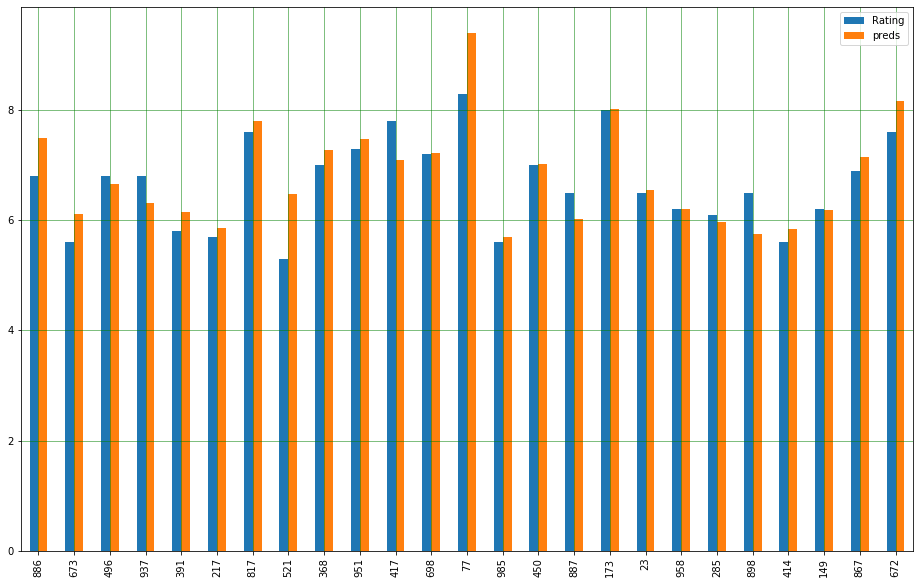

In [102]:
df1 = df_accuracy.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='1.0', color='black')
plt.show()

## Conclusion

The model multiple linear regression model built to predict movie rating based off genre, votes, runtime, and metascore includes 25 coefficients and explains about 60% of the depedent variable variation. Because the outlier detection DBSCAN algorithm did not detect any outliers based on the single cluster it identified, the fit of this model could have been impacted by values that were shown in the bopxlots generated during the data exploration process as outliers. <br> 
The feature Year was left out of the model because of its high correlation and covariance with votes as shown in the correlation and covariance matrices above. This is likely due to the fact that IMDb user engagement increased year over year between 2006 and 2016 as the internet became more common. The feature Rank was omitted from the data included in the model because as a unique number assigned to each movie there should logically be little to no correlation between a movie's rank and its rating in this dataset. <br>
From the coefficients in the model, it can be seen that certain genres have the highest impact on the rating of a movie. In particular whether a movie is classified as a War movie, an Animation movie, or a Musical movie have to stroong effect on the movie's rating.